# Are Accounts Receivables Correlated With Revenue?
## Documentation http://calcbench.github.io/python_api_client/html/index.html

### Import the Calcbench Client

In [1]:
%pip install calcbench-api-client[Pandas]

Note: you may need to restart the kernel to use updated packages.


In [4]:
import calcbench as cb 

### Get tickers in the S&P 500

In [5]:
tickers = cb.tickers(index="SP500")

### Get quarterly data from Calcbench and compute the correlation between accounts receivable and revenue.

In [8]:
cb.standardized?

In [17]:
standardized_metrics = [
    "Revenue",
    "AccountsReceivable",
]  # Full list of metrics @ https://www.calcbench.com/home/standardizedmetrics
quarterly_data = cb.standardized(company_identifiers=tickers, metrics=standardized_metrics)
quarter_corr = quarterly_data["accountsreceivable"].corrwith(quarterly_data["revenue"])
quarter_corr.hist(bins=50, figsize=(15, 10))

ReadTimeout: HTTPSConnectionPool(host='www.calcbench.com', port=443): Read timed out. (read timeout=1200)

In [ ]:
cb.standardized

### Do the same for annual data.

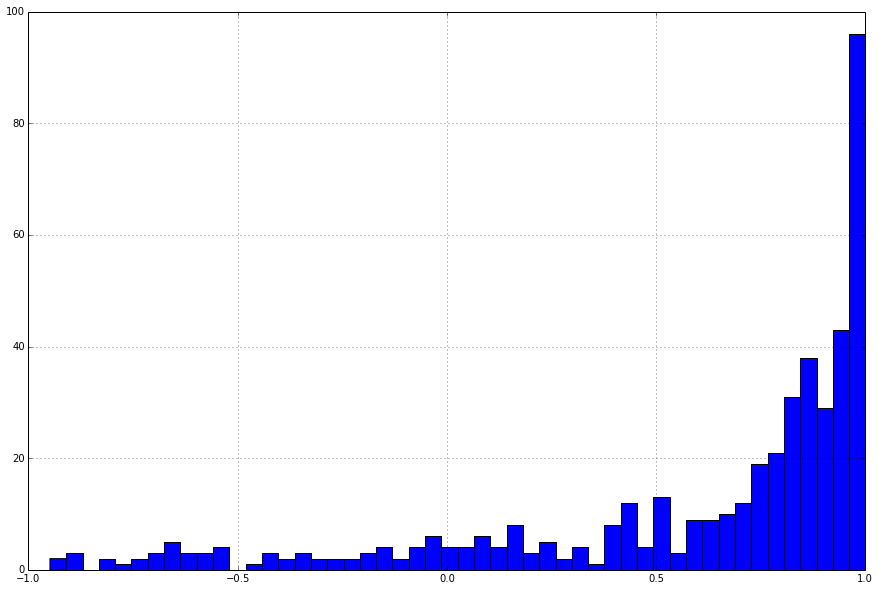

In [24]:
annual_data = cb.normalized_data(
    tickers, ["revenue", "accountsreceivable"], 2008, 0, 2014, 0
)
annual_corr = annual_data["accountsreceivable"].corrwith(annual_data["revenue"])
annual_corr.hist(bins=50, figsize=(15, 10))

### YUM is an example of a company with negative quarterly correlation.

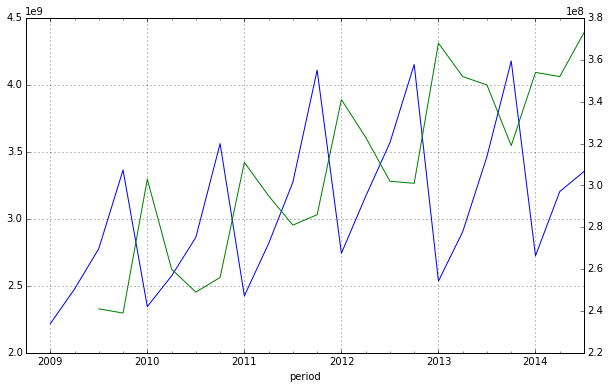

In [28]:
quarterly_data["revenue"]["YUM"].plot(figsize=(10, 6))
quarterly_data["accountsreceivable"]["YUM"].plot(secondary_y=True)

###But YUM's correlation is positive on an annual basis.

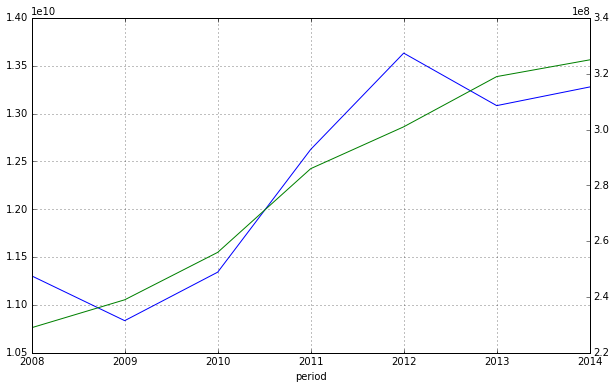

In [19]:
annual_data["revenue"]["YUM"].plot(figsize=(10, 6))
annual_data["accountsreceivable"]["YUM"].plot(secondary_y=True)